In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## **Global API**
Matplotlib's default pyplot API has a global, MATLAB-style interface, as we've already seen:



In [40]:
x = np.arange(-10, 11)

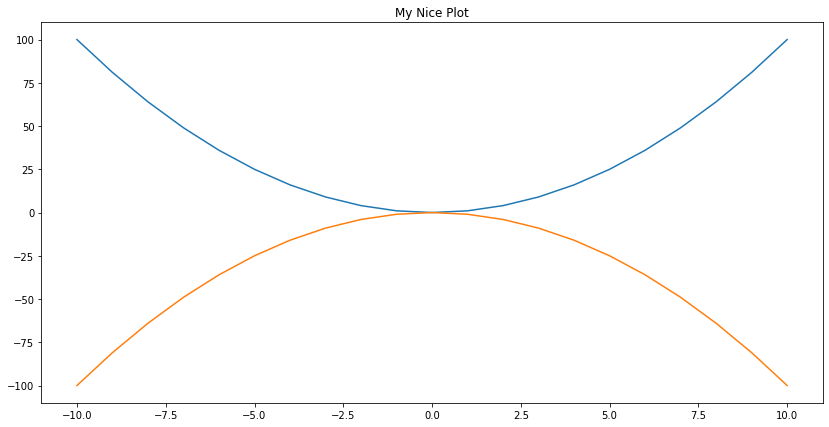

In [41]:
plt.figure(figsize=(14,7))
plt.title("My Nice Plot")
plt.plot(x, x**2)
plt.plot(x, -1 * (x**2))

Text(0, 0.5, 'X Squared')

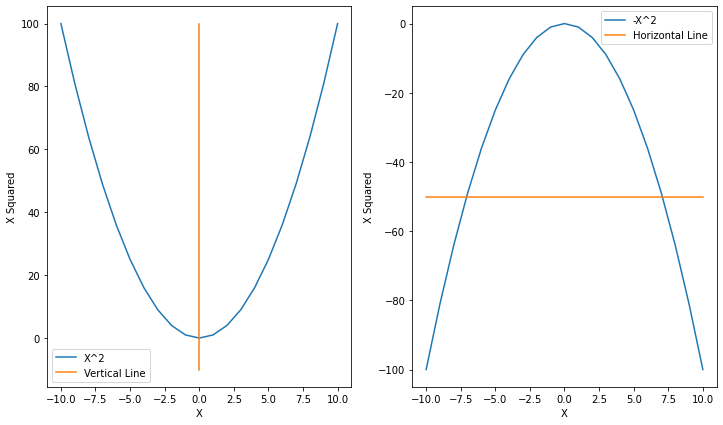

In [42]:
plt.figure(figsize=(12,7))
plt.title("My plottings")

plt.subplot(1, 2, 1)  # row=1, columns=2 and it's the 1st plot
plt.plot(x, x**2)
plt.plot([0,0,0], [-10, 0, 100])
plt.legend(['X^2', 'Vertical Line'])
plt.xlabel("X")
plt.ylabel("X Squared")

plt.subplot(1, 2, 2)  #row=1, columns=2, and it's the second plot
plt.plot(x, -1*(x**2))
plt.plot([-10,0,10], [-50, -50, -50])
plt.legend(["-X^2", "Horizontal Line"])
plt.xlabel("X")
plt.ylabel("X Squared")

### **OOP Interface**

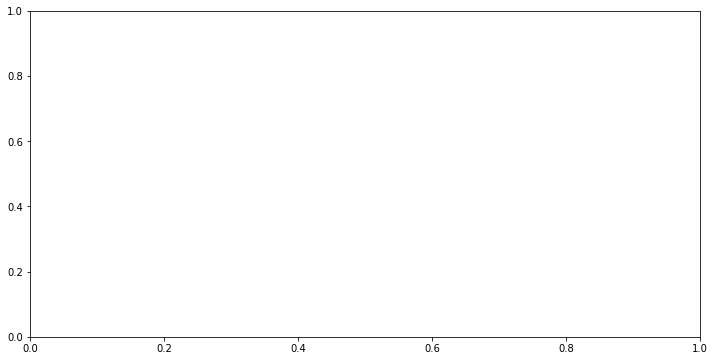

In [43]:
fig, axes = plt.subplots(figsize=(12,6))

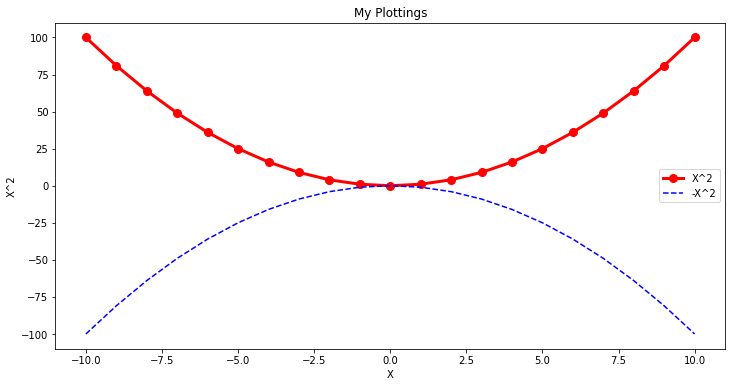

In [44]:
axes.plot(x, (x**2), color="red", linewidth=3, marker="o", markersize=8, label='X^2')
axes.plot(x, -1*(x**2), "b--", label='-X^2')
axes.set_xlabel("X")
axes.set_ylabel("X^2")

axes.set_title("My Plottings")




axes.legend()
fig

Text(0.5, 1.0, 'My Nice Plots')

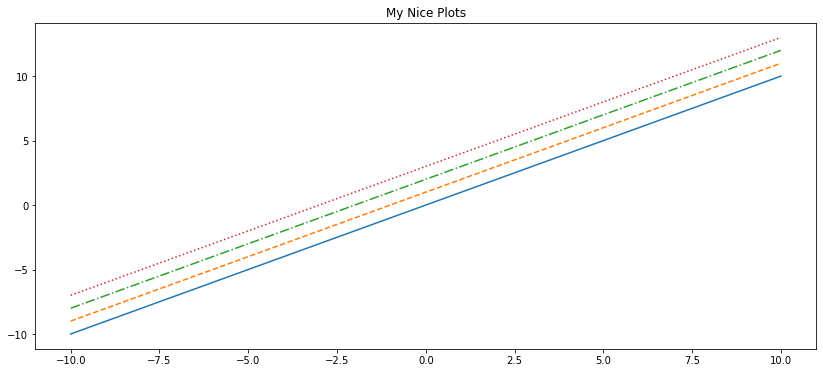

In [45]:
fig, axes = plt.subplots(figsize=(14,6))
axes.plot(x, (x+0), linestyle="solid")
axes.plot(x, (x+1), linestyle="dashed")
axes.plot(x, (x+2), linestyle="dashdot")
axes.plot(x, (x+3), linestyle="dotted")

axes.set_title("My Nice Plots")

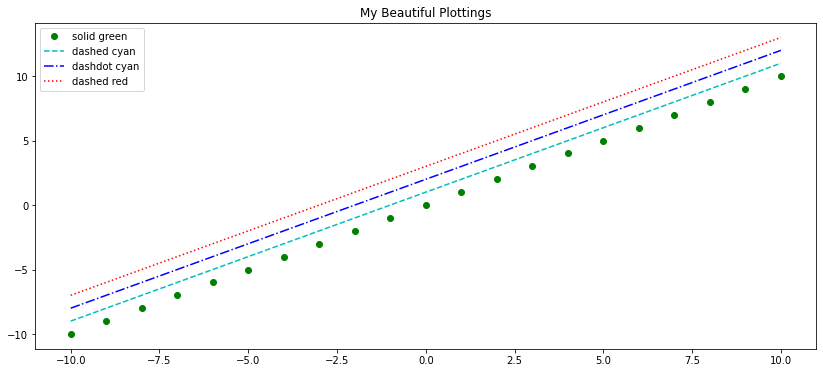

In [46]:
fix, axes = plt.subplots(figsize=(14,6))

axes.plot(x, x+0, "og", label="solid green")
axes.plot(x, x+1, "--c", label="dashed cyan")
axes.plot(x, x+2, "-.b", label="dashdot cyan")
axes.plot(x, x+3, ":r", label="dashed red")

axes.set_title("My Beautiful Plottings")
axes.legend()

In [47]:
print("Markers: {}".format([m for m in plt.Line2D.markers]))

Markers: ['.', ',', 'o', 'v', '^', '<', '>', '1', '2', '3', '4', '8', 's', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd', '|', '_', 'P', 'X', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 'None', None, ' ', '']


In [48]:

linestyles = ['_', '-', '--', ':']

print('Line styles: {}'.format(linestyles))

Line styles: ['_', '-', '--', ':']


## **Other types of plots**
**Figures and subfigures** 

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f65ffcc09d0>)

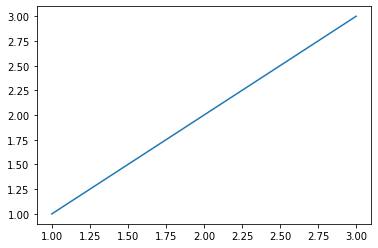

In [49]:
plot_object = plt.subplots()
fig, ax = plot_object 
ax.plot([1, 2, 3], [1, 2, 3])
plot_object

(<Figure size 1008x432 with 4 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f65fe6cc550>,
       dtype=object))

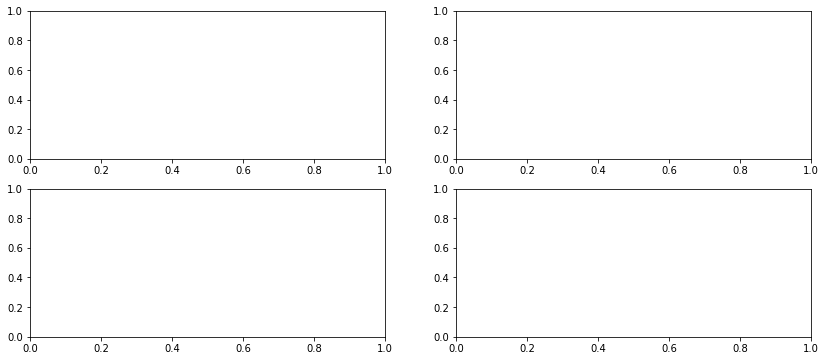

In [50]:
plot_object = plt.subplots(nrows=2, ncols=2, figsize=(14, 6))

fig, ((ax1, ax2), (ax3, ax4)) = plot_object

plot_object

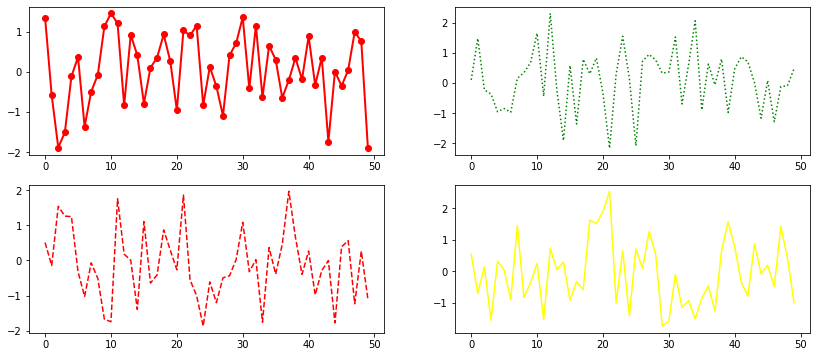

In [51]:
ax4.plot(np.random.randn(50), c="yellow")
ax3.plot(np.random.randn(50), c="red", linestyle="--")
ax2.plot(np.random.randn(50), c="green", linestyle=":")
ax1.plot(np.random.randn(50), c="red", marker="o", linewidth=2.0)
fig

**The subplot2grid command**

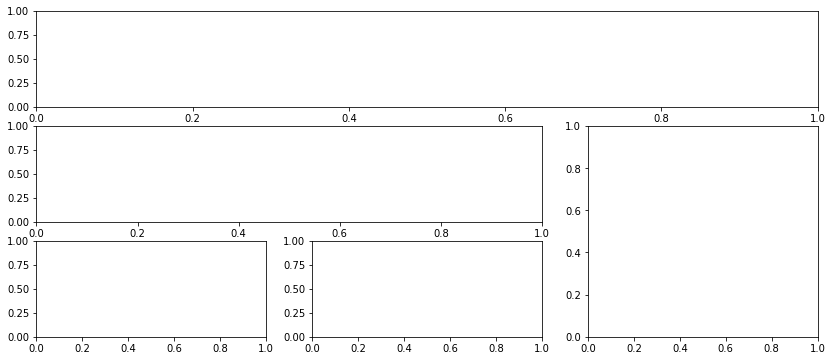

In [52]:
plt.figure(figsize=(14, 6))

ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,3), (1,2), rowspan=2)
ax4 = plt.subplot2grid((3,3), (2,0))
ax5 = plt.subplot2grid((3,3), (2,1))

## **Scatter Plot**

In [53]:
N = 50
x=np.random.randn(N)
y=np.random.randn(N)
colors = np.random.randn(N)

area = np.pi * ((20 * np.random.randn(N))**2) # 0 to 15 point raddi

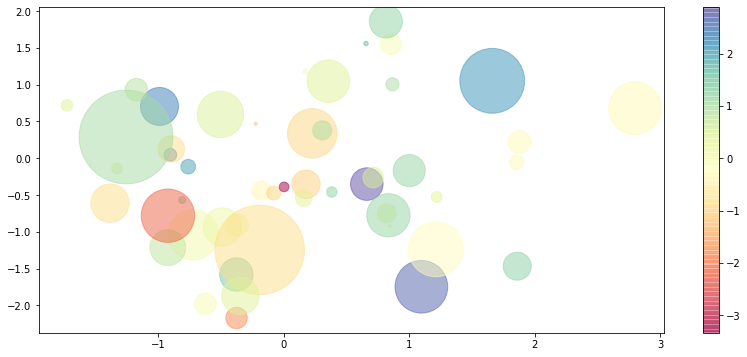

In [54]:
plt.figure(figsize=(14,6))

plt.scatter(x, y, s=area, c=colors, alpha=0.5,cmap="Spectral")
plt.colorbar()
plt.show()

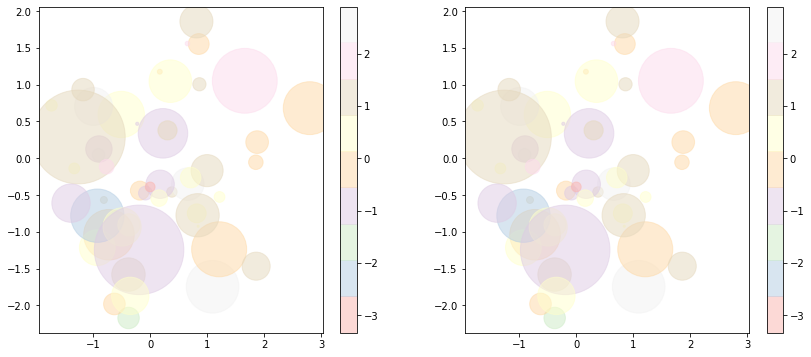

In [55]:
fig = plt.figure(figsize=(14,6))

ax1 = fig.add_subplot(1,2,1)
plt.scatter(x, y, s=area, c=colors, alpha=0.5,cmap="Pastel1")
plt.colorbar()


ax2 = fig.add_subplot(1,2,2)
plt.scatter(x, y, s=area, c=colors, alpha=0.5,cmap="Pastel1")
plt.colorbar()
plt.show()

Here is the full cmap options available: https://matplotlib.org/users/colormaps.html

### **Histograms**

In [56]:
values = np.random.randn(1000)

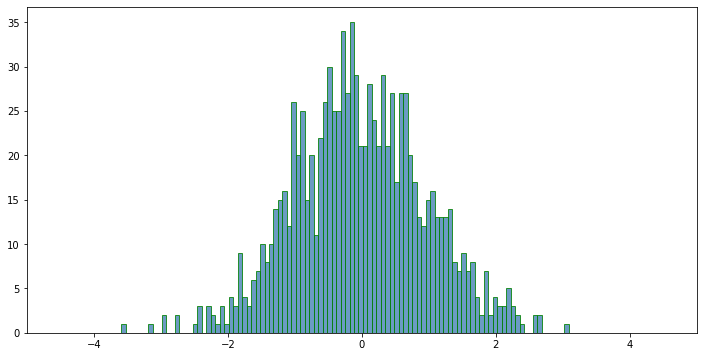

In [57]:
plt.subplots(figsize=(12,6))
plt.hist(values, bins=100, alpha=0.8, histtype="bar", color="steelblue", edgecolor="green")
plt.xlim(xmin=-5, xmax=5)
plt.show()

In [58]:
fig.savefig("hist.png")

### **KDE (kernel density estimation)**

In [59]:
from scipy import stats
density = stats.kde.gaussian_kde(values)
density

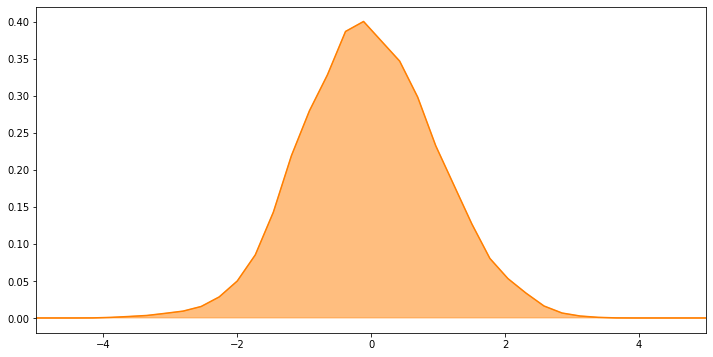

In [60]:
plt.subplots(figsize=(12,6))

values2= np.linspace(min(values)-10, max(values)+10, 100)
plt.plot(values2, density(values2), color="#FF7F00")
plt.fill_between(values2, 0, density(values2), alpha=0.5, color="#FF7F00")
plt.xlim(xmin=-5, xmax=5)
plt.show()

## **Combine plots**

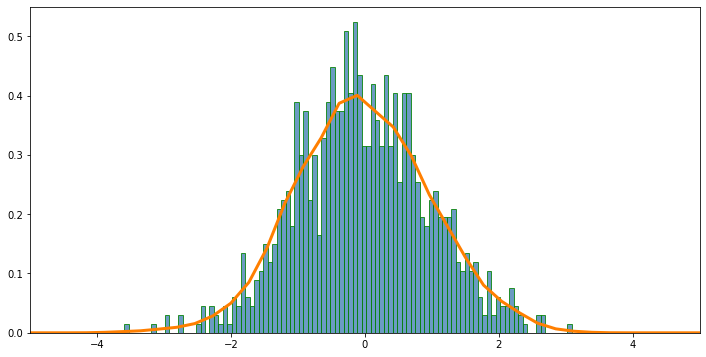

In [61]:
plt.subplots(figsize=(12, 6))

plt.hist(values, bins=100, alpha=0.8, density=1,
          histtype='bar', color='steelblue',
          edgecolor='green')

plt.plot(values2, density(values2), color='#FF7F00', linewidth=3.0)
plt.xlim(xmin=-5, xmax=5)

plt.show()


## **Bar Plots**

In [62]:
Y = np.random.rand(1, 5)[0]
Y2 = np.random.rand(1, 5)[0]
Y

array([0.7247557 , 0.39771887, 0.5099563 , 0.95214404, 0.35301254])

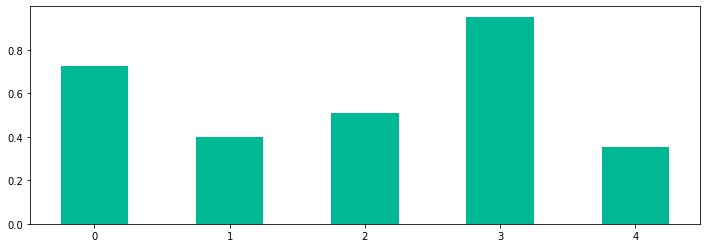

In [63]:
plt.figure(figsize=(12, 4))
plt.bar(np.arange(len(Y)), Y, width=0.5, color="#00b894")
plt.show()

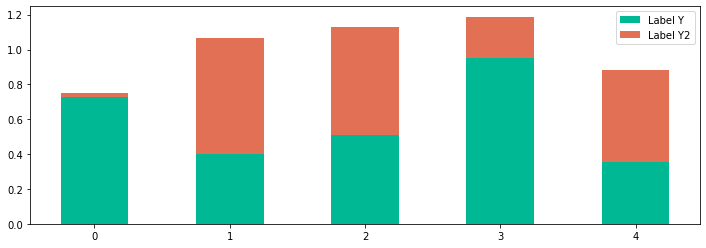

In [64]:
plt.figure(figsize=(12, 4))

plt.bar(np.arange(len(Y)), Y, width=0.5, color="#00b894", label="Label Y")
plt.bar(np.arange(len(Y2)), Y2, width=0.5, color="#e17055", bottom=Y, label="Label Y2")
plt.legend()
plt.show()

## **Boxplots and outlier detection**

In [65]:
values = np.concatenate([np.random.randn(10), np.array([10, 15, -10, -15])])

(array([1., 1., 0., 0., 7., 3., 0., 0., 1., 1.]),
 array([-15., -12.,  -9.,  -6.,  -3.,   0.,   3.,   6.,   9.,  12.,  15.]),
 <a list of 10 Patch objects>)

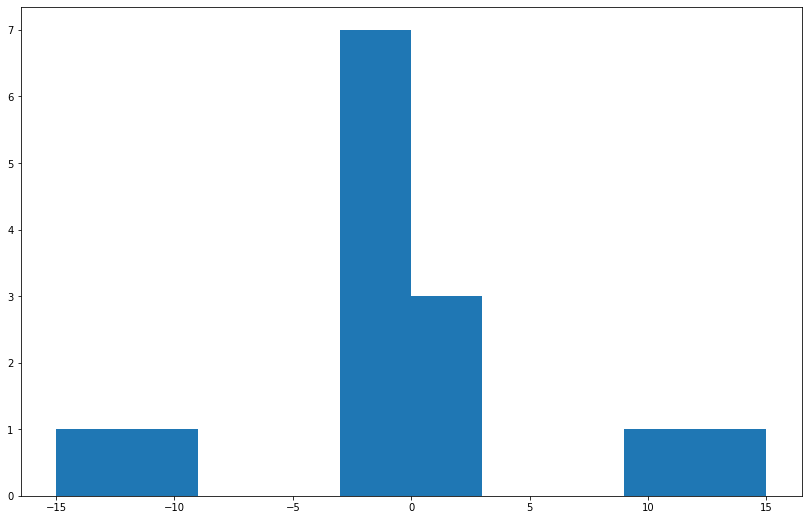

In [66]:
plt.figure(figsize=(14,9))
plt.hist(values)

{'boxes': [<matplotlib.lines.Line2D at 0x7f65fea24290>],
 'caps': [<matplotlib.lines.Line2D at 0x7f65fea26510>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f65ed8ab2d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f65fea26350>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f65fea247d0>,
  <matplotlib.lines.Line2D at 0x7f65fea24d10>]}

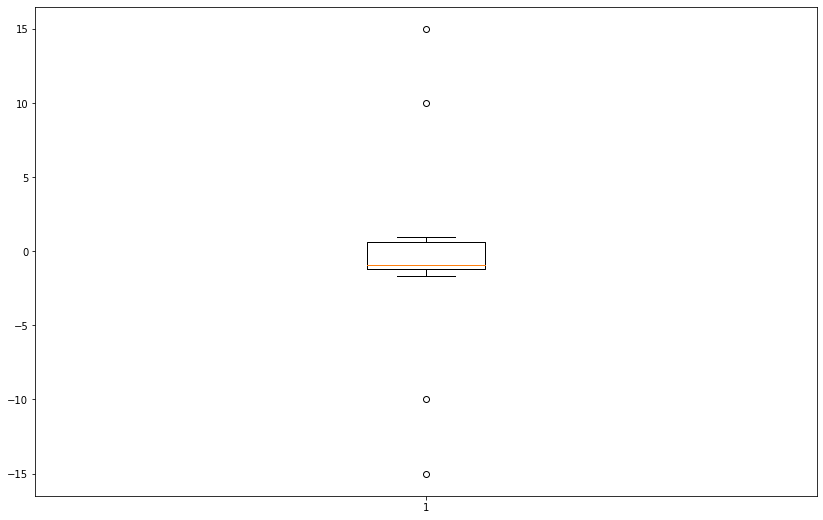

In [67]:
plt.figure(figsize=(14,9))
plt.boxplot(values)

In [68]:
#For many real life examples, visit this github[These are actually based on your practices]
!git clone https://github.com/ine-rmotr-curriculum/data-cleaning-rmotr-freecodecamp.git

Cloning into 'data-cleaning-rmotr-freecodecamp'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 23 (delta 8), reused 19 (delta 6), pack-reused 0
Unpacking objects: 100% (23/23), done.
